<a href="https://colab.research.google.com/github/WaelMohsen/.NET-Backend-Developer-Roadmap/blob/master/POC_Classification_Per_Topic_Ver2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
#Setup and Constructions

In [ ]:
!pip install bertopic==0.16.0 datasets==2.16.1 Arabic-Stopwords==0.4.3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.1/154.1 kB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 507.1/507.1 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 360.5/360.5 kB 25.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 38.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.9/90.9 kB 12.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.8/132.8 kB 13.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 15.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 16.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.4/126.4 kB 16.6 MB/s eta 0:00:00
  Using cached Cython-0.29.37-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.

In [ ]:
from datasets import load_dataset
import pandas as myPandas
import re
import random

import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

import matplotlib.pyplot as myMatPlot
import seaborn as mySeaBorn

from datetime import datetime

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


---
#Data Cleansing function

In [ ]:
def clean_text(text: str):
    if not isinstance(text, str):
        # raise TypeError("text must be a string")
        return ""

    # remove urls
    text = re.sub(r"http\S+", "URL", text)

    # replace any digit with Numeric
    text = re.sub(r"\d+", "Numeric", text)

    # set space before and after any punctuation
    text = re.sub(r"([^\w\s])", r" \1 ", text)

    # remove extra spaces
    text = re.sub(r"\s+", " ", text)

    words = word_tokenize(text)
    text = " ".join([ w for w in words if len(w) > 1 ] )

    return text.lower().strip()



---


#Load Data Sets

In [ ]:
englishDataSet = load_dataset("m-ric/english_historical_quotes")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Generating train split:   0%|          | 0/24022 [00:00<?, ? examples/s]

In [ ]:
feedbackDataSet = load_dataset("kaist-ai/Feedback-Collection")

Generating train split: 0 examples [00:00, ? examples/s]

In [ ]:
newsDataSet = load_dataset("saudinewsnet")

In [ ]:
englishDataSet['train'][0]

In [ ]:
feedbackDataSet['train'][0]

In [ ]:
newsDataSet['train'][0]



---


#Build Dictionary for each dataset

In [ ]:
dic_newsDataSet = [
    {
        "text": record["content"],
        "source": record["source"],
        "date": record["date_extracted"]
    }
    for record in newsDataSet['train']
]

dic_feedbackDataSet = [
    {
        "instruction": record["orig_instruction"],
        "feedback": record["orig_feedback"],
        "response": record["orig_response"],
        "score": record["orig_score"]
    }
    for record in feedbackDataSet['train']
]

dic_englishDataSet = [
    {
        "text": record["quote"],
        "source": record["author"]
    }
    for record in englishDataSet['train']
]



---


#Convert the Dictionaries to Data Frames


In [ ]:
newsDataFrame = myPandas.DataFrame( dic_newsDataSet )
newsDataFrame = newsDataFrame.sample(frac=1, random_state = 611)

feedbackDataFrame = myPandas.DataFrame( dic_feedbackDataSet )
feedbackDataFrame = feedbackDataFrame.sample(frac=1, random_state = 611)

englishDataFrame = myPandas.DataFrame( dic_englishDataSet )
englishDataFrame = englishDataFrame.sample(frac=1, random_state = 611)

In [ ]:
newsDataFrame.head()

In [ ]:
feedbackDataFrame.head()

In [ ]:
englishDataFrame.head()



---


#Clean the data of type string/text


In [ ]:
newsDataFrame['text'] = newsDataFrame['text'].apply(clean_text)

# feedbackDataFrame['instruction'] = feedbackDataFrame['instruction'].apply(clean_text)
# feedbackDataFrame['feedback'] = feedbackDataFrame['feedback'].apply(clean_text)
# feedbackDataFrame['response'] = feedbackDataFrame['response'].apply(clean_text)

englishDataFrame['text'] = englishDataFrame['text'].apply(clean_text)

---
#Add extra length field to describe the data length



In [ ]:
newsDataFrame['text_length'] = newsDataFrame['text'].apply(len)

feedbackDataFrame['instruction_length'] = feedbackDataFrame['instruction'].apply(len)
feedbackDataFrame['feedback_length'] = feedbackDataFrame['feedback'].apply(len)
feedbackDataFrame['response_length'] = feedbackDataFrame['response'].apply(len)

englishDataFrame['text_length'] = englishDataFrame['text'].apply(len)

In [ ]:
newsDataFrame.head()

,text,source,date,text_length
16967,أغلق المؤشر العام للسوق المالية السعودية `` تد...,alriyadh,2015-08-02 23:15:39,2016
16779,بدأت روسيا تتحرك ببطء من الدفاع البسيط ومحاولة...,aljazirah,2015-08-02 23:47:24,4181
3602,وضع وين روني لنفسه هدف بتسجيل numeric هدف في ا...,almadina,2015-07-22 13:51:09,1148
30769,شارك من خلال تويتر فيسبوك جوجل بلس اكتب رأيك ت...,okaz,2015-08-11 13:34:05,2527
24581,تواصل قوات المقاومة الشعبية تطهير ما تبقى من ج...,alwatan,2015-08-07 06:32:59,1516


In [ ]:
#feedbackDataFrame.head()
englishDataFrame.head()

,text,source,text_length
7287,cock your hat angles are attitudes,Frank Sinatra,34
6562,disappointment is sort of bankruptcy the bankr...,Eric Hoffer,105
12020,the artist alone sees spirits but after he has...,Johann Wolfgang von Goethe,97
13386,love is much nicer to be in than an automobile...,Judith Viorst,124
15539,restore myself when alone,Marilyn Monroe,25


---
#Visualize the data over a histograms




<Axes: xlabel='text_length', ylabel='Count'>

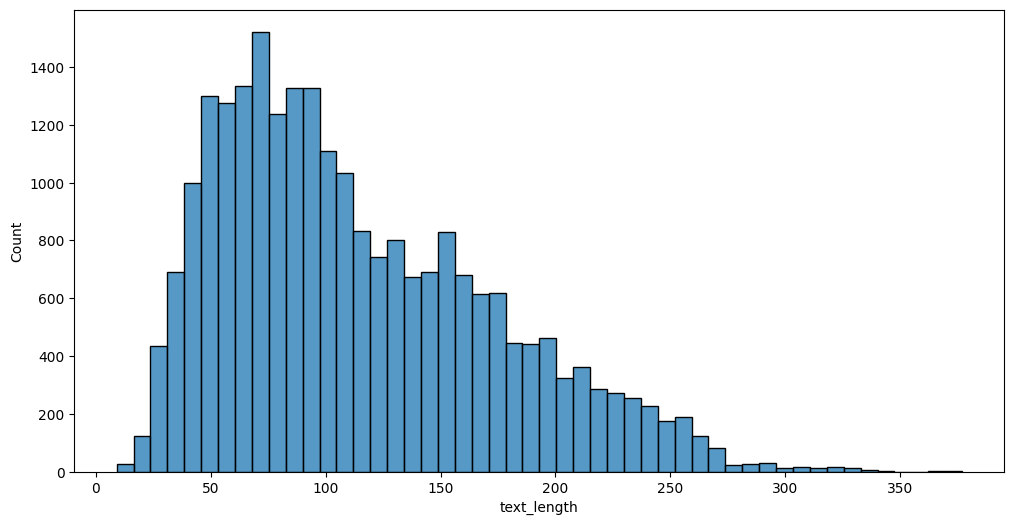

In [ ]:
myMatPlot.figure(figsize=(12, 6))
mySeaBorn.histplot(englishDataFrame['text_length'], bins=50)

#mySeaBorn.histplot(feedbackDataFrame['instruction_length'], bins=50)
#mySeaBorn.histplot(feedbackDataFrame['feedback_length'], bins=50)
#mySeaBorn.histplot(feedbackDataFrame['response_length'], bins=50)

#mySeaBorn.histplot(newsDataFrame['text_length'], bins=50)

<Axes: xlabel='text_length', ylabel='Count'>

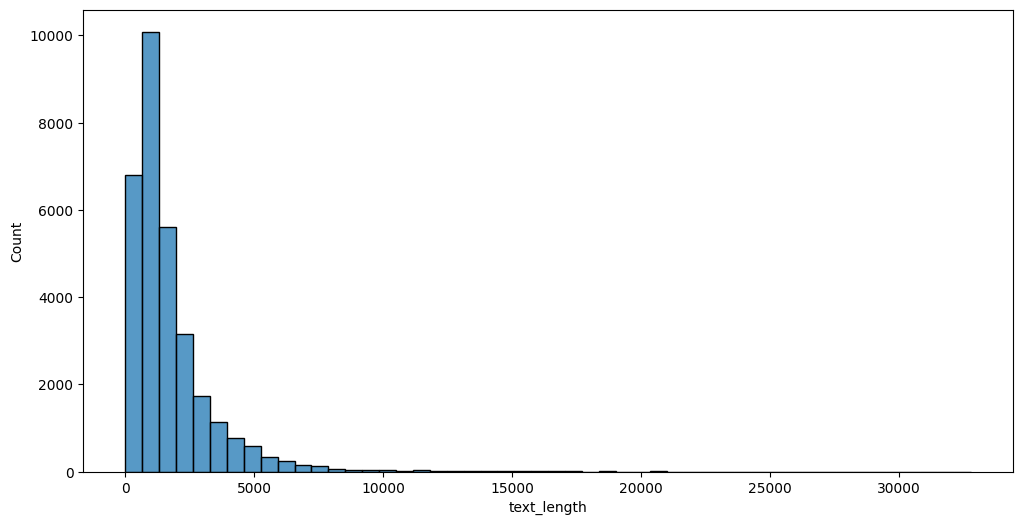

In [ ]:
myMatPlot.figure(figsize=(12, 6))
#mySeaBorn.histplot(englishDataFrame['text_length'], bins=50)

#mySeaBorn.histplot(feedbackDataFrame['instruction_length'], bins=50)
#mySeaBorn.histplot(feedbackDataFrame['feedback_length'], bins=50)
#mySeaBorn.histplot(feedbackDataFrame['response_length'], bins=50)

mySeaBorn.histplot(newsDataFrame['text_length'], bins=50)

---
#Add more cleansing based on the length and duplications




In [ ]:
#--------------------------------------------------------------------------------------------------------------
print("newsDataFrame = ", newsDataFrame.shape)
newsDataFrame = newsDataFrame[ newsDataFrame['text_length'] <= 6000 ]
newsDataFrame.drop_duplicates(['text'], inplace = True)
print("newsDataFrame = ", newsDataFrame.shape)

#--------------------------------------------------------------------------------------------------------------
print("englishDataFrame = ", englishDataFrame.shape)
englishDataFrame = englishDataFrame[ englishDataFrame['text_length'] <= 270 ]
englishDataFrame.drop_duplicates(['text'], inplace = True)
print("englishDataFrame = ", englishDataFrame.shape)

#--------------------------------------------------------------------------------------------------------------
print("feedbackDataFrame = ", feedbackDataFrame.shape)

feedbackDataFrame = feedbackDataFrame[ feedbackDataFrame['instruction_length'] <= 800 ]
feedbackDataFrame = feedbackDataFrame[ feedbackDataFrame['feedback_length'] <= 1200 ]
feedbackDataFrame = feedbackDataFrame[ feedbackDataFrame['response_length'] <= 2000 ]

feedbackDataFrame.drop_duplicates(['instruction'], inplace = True)
feedbackDataFrame.drop_duplicates(['feedback'], inplace = True)
feedbackDataFrame.drop_duplicates(['response'], inplace = True)

print("feedbackDataFrame = ", feedbackDataFrame.shape)

newsDataFrame =  (31030, 4)
newsDataFrame =  (29055, 4)


---
#Convert columns to its correct formate then extract the Date only with no time


In [ ]:
newsDataFrame['date_Stamp'] = newsDataFrame['date'].apply(lambda row: datetime.strptime(row, "%Y-%m-%d %H:%M:%S"))
newsDataFrame['date_Stamp'] = newsDataFrame['date_Stamp'].apply(lambda row: row.replace(hour=0, minute=0, second=0))
newsDataFrame.head()

,text,source,date,text_length,date_Stamp
16967,أغلق المؤشر العام للسوق المالية السعودية `` تد...,alriyadh,2015-08-02 23:15:39,2016,2015-08-02
16779,بدأت روسيا تتحرك ببطء من الدفاع البسيط ومحاولة...,aljazirah,2015-08-02 23:47:24,4181,2015-08-02
3602,وضع وين روني لنفسه هدف بتسجيل numeric هدف في ا...,almadina,2015-07-22 13:51:09,1148,2015-07-22
30769,شارك من خلال تويتر فيسبوك جوجل بلس اكتب رأيك ت...,okaz,2015-08-11 13:34:05,2527,2015-08-11
24581,تواصل قوات المقاومة الشعبية تطهير ما تبقى من ج...,alwatan,2015-08-07 06:32:59,1516,2015-08-07


---
⛹
# **Applying the Per-Topic Algorithm. The following steps are completely modular:**

1.  Embedding documents using Transformers (Sentence Transformers)
2.  Reducing embeddings dimensionality
3.  Clustering reduced embeddings into topics
4.  Tokenization of topics
5.  Set Weights for the tokens
6.  Represent topics with one or multiple representations

In [ ]:
#=============================================================================================
# 1- Embedding documents using Transformers (Sentence Transformers)
from sentence_transformers import SentenceTransformer

newsSentenceTransformer_ModelId = "sentence-transformers/distiluse-base-multilingual-cased-v2"  # "sentence-transformers/LaBSE"
newsEmbeddingModel = SentenceTransformer(newsSentenceTransformer_ModelId, device= "cuda:0")
newsEmbeddings = newsEmbeddingModel.encode(newsDataFrame['text'].values, show_progress_bar= True)

englishSentenceTransformer_ModelId = "sentence-transformers/all-MiniLM-L12-v2"
englishEmbeddingModel = SentenceTransformer(englishSentenceTransformer_ModelId, device= "cuda:0")
englishEmbeddings = englishEmbeddingModel.encode(englishDataFrame['text'].values, show_progress_bar= True)

# feedbackInstructionEmbeddings = embeddingModel.encode(feedbackDataFrame['instruction'].values, show_progress_bar= True)
# feedbackFeedbackEmbeddings = embeddingModel.encode(feedbackDataFrame['feedback'].values, show_progress_bar= True)
# feedbackResponseEmbeddings = embeddingModel.encode(feedbackDataFrame['response'].values, show_progress_bar= True)

print(newsEmbeddings.shape)
print(englishEmbeddings.shape)
# print(feedbackInstructionEmbeddings.shape)
# print(feedbackFeedbackEmbeddings.shape)
# print(feedbackResponseEmbeddings.shape)

modules.json:   0%|          | 0.00/341 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/2.69k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/610 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/539M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/531 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/996k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.96M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

2_Dense/config.json:   0%|          | 0.00/114 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.58M [00:00<?, ?B/s]

Batches:   0%|          | 0/908 [00:00<?, ?it/s]

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/573 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/134M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/352 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/745 [00:00<?, ?it/s]

(29055, 512)
(23830, 384)


In [ ]:
#=============================================================================================
#2- Reducing embeddings dimensionality
from umap import UMAP
newsDimensionalityReductionModel = UMAP(n_neighbors = 15, n_components = 15,
                  min_dist = 0.0, metric = 'cosine',
                  random_state = 611)

englishDimensionalityReductionModel = UMAP(n_neighbors = 15, n_components = 15,
                  min_dist = 0.0, metric = 'cosine',
                  random_state = 611)

In [ ]:
#=============================================================================================
# 3- Clustering reduced embeddings into topics
from hdbscan import HDBSCAN

# A higher min_cluster_size will generate fewer topics
# A lower min_cluster_size will generate more topics.
newsClustringModel = HDBSCAN(min_cluster_size = 50,
                        metric = 'euclidean',
                        cluster_selection_method = 'eom',
                        prediction_data = True)

englishClustringModel = HDBSCAN(min_cluster_size = 50,
                        metric = 'euclidean',
                        cluster_selection_method = 'eom',
                        prediction_data = True)

In [ ]:
#=============================================================================================
# 4- Tokenization of topics (Vectorizer)
from sklearn.feature_extraction.text import CountVectorizer
import arabicstopwords.arabicstopwords as MyArabicStopWords

nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
# nltk.download('punkt')
# nltk.download('wordnet')
# nltk.download('omw-1.4')

# Load Arabic stop words
arabicWordsIgnoreList = MyArabicStopWords.stopwords_list()

# Load English stop words
englishWordsIgnoreList = list(stopwords.words('english'))

newsVectorizerModel = CountVectorizer(min_df = 3,
                                   stop_words = arabicWordsIgnoreList,
                                   analyzer = 'word',
                                   max_df = 0.5,
                                   ngram_range = (1, 3)
                                   )

englishVectorizerModel = CountVectorizer(min_df = 3,
                                   stop_words = englishWordsIgnoreList,
                                   analyzer = 'word',
                                   max_df = 0.5,
                                   ngram_range = (1, 3)
                                   )

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
#============================================================================================
#Topic Representer
from bertopic.representation import KeyBERTInspired

newsKeyPerToicModel = KeyBERTInspired()
newsTopicRepresenter_model = {
    "KeyBERT": newsKeyPerToicModel
}

englishKeyPerToicModel = KeyBERTInspired()
englishTopicRepresenter_model = {
    "KeyBERT": englishKeyPerToicModel
}



---
# Now, let's run the model to wire all together


In [ ]:
#============================================================================================
#Let's Go
from bertopic import BERTopic

# Initializing the news BERTopic Model
newsTopicsModel = BERTopic(
    # Pipeline models
    embedding_model = newsEmbeddingModel,
    umap_model = newsDimensionalityReductionModel,
    hdbscan_model = newsClustringModel,
    vectorizer_model = newsVectorizerModel,
    representation_model = newsTopicRepresenter_model,

    # Hyperparameters
    top_n_words = 10,
    verbose = True)

newsTopics, newsTopicsPropabilities = newsTopicsModel.fit_transform(
    newsDataFrame['text'].values,
    newsEmbeddings)

newsDataFrame['topic'] = newsTopics
newsDataFrame['Probability'] = newsTopicsPropabilities

2024-02-05 05:05:18,100 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2024-02-05 05:06:09,879 - BERTopic - Dimensionality - Completed ✓
2024-02-05 05:06:09,883 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-02-05 05:06:18,039 - BERTopic - Cluster - Completed ✓
2024-02-05 05:06:18,052 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-02-05 05:07:25,997 - BERTopic - Representation - Completed ✓


In [ ]:
from bertopic import BERTopic

  # Initializing the news BERTopic Model
englishTopicsModel = BERTopic(
    # Pipeline models
    embedding_model = englishEmbeddingModel,
    umap_model = englishDimensionalityReductionModel,
    hdbscan_model = englishClustringModel,
    vectorizer_model = englishVectorizerModel,
    representation_model = englishTopicRepresenter_model,

    # Hyperparameters
    top_n_words = 10,
    verbose = True)

englishTopics, englishTopicsPropabilities = englishTopicsModel.fit_transform(
    englishDataFrame['text'].values,
    englishEmbeddings)

englishDataFrame['topic'] = englishTopics
englishDataFrame['Probability'] = englishTopicsPropabilities

2024-02-05 04:54:33,596 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2024-02-05 04:55:10,836 - BERTopic - Dimensionality - Completed ✓
2024-02-05 04:55:10,842 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-02-05 04:55:14,047 - BERTopic - Cluster - Completed ✓
2024-02-05 04:55:14,059 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-02-05 04:55:19,765 - BERTopic - Representation - Completed ✓


In [ ]:
newsTopicsModel.get_topic_info()

,Topic,Count,Name,Representation,KeyBERT,Representative_Docs
0,-1,9591,-1_السياحية_الملكي الأمير_السمو الملكي الأمير_...,"[السياحية, الملكي الأمير, السمو الملكي الأمير,...","[الملك سلمان عبدالعزيز, الأمير خالد الفيصل, سل...",[أك صاحب السمو الأمير جلوي بن عبدالعزيز بن مسا...
1,0,3849,0_النادي_القدم_اللاعب_الموسم,"[النادي, القدم, اللاعب, الموسم, اللاعبين, نادي...","[السعودي لكرة القدم, الأول لكرة القدم, الموسم ...",[سيكون باريس سان جيرمان مرشح فوق العادة لإحراز...
2,1,1300,1_عدن_المقاومة_اليمن_الحوثيين,"[عدن, المقاومة, اليمن, الحوثيين, الحوثي, اليمن...","[عبدالله صالح, للشعب اليمني, الشعب اليمني, الت...",[شنت طائرات التحالف العربي امس الجمعة عدة غارا...
3,2,847,2_قوات الطوارئ_الإرهابي_مسجد_الإرهاب,"[قوات الطوارئ, الإرهابي, مسجد, الإرهاب, الإرها...","[تفجير مسجد, مسجد قوات الطوارئ, استهدف مسجد قو...",[وصف أمنيون في مناطق متباينة العمل الإرهابي ال...
4,3,702,3_مستشفى_المرضى_الطفلة_الشؤون الصحية,"[مستشفى, المرضى, الطفلة, الشؤون الصحية, الطبي,...","[مستشفى الملك فهد, مستشفى الملك فيصل, الصحية ب...",[تربعت منطقة مكة المكرمة على هرم مناطق المملكة...
...,...,...,...,...,...,...
77,76,54,76_البحرين_مملكة البحرين_مملكة_البحرينية,"[البحرين, مملكة البحرين, مملكة, البحرينية, الإ...","[التدخلات الإيرانية, الشيخ راشد عبدالله, لمملك...",[أكد معالي الفريق الركن الشيخ راشد بن عبدالله ...
78,77,53,77_كورونا_numeric حالة_بفيروس كورونا_وزارة الصحة,"[كورونا, numeric حالة, بفيروس كورونا, وزارة ال...","[أعلنت وزارة الصحة, وزارة الصحة اليوم, وزارة ا...",[أعلنت وزارة الصحة اليوم السبت تسجيل حالة إصاب...
79,78,52,78_العسل_النحل_الباحة_المهرجان,"[العسل, النحل, الباحة, المهرجان, مهرجان العسل,...","[سعود عبدالعزيز أمير, الأمير مشاري سعود, أمير ...",[يرعى صاحب السمو الملكي الأمير مشاري بن سعود ب...
80,79,51,79_الفعاليات_فعاليات_عيد الرياض_الأسر المنتجة,"[الفعاليات, فعاليات, عيد الرياض, الأسر المنتجة...","[فعاليات عيد الرياض, عيد الرياض, الرياض بعيد ا...",[شارك أكثر من numeric أسرة منتجة في احتفالات ع...


In [ ]:
englishTopicsModel.get_topic_info()

,Topic,Count,Name,Representation,KeyBERT,Representative_Docs
0,-1,7627,-1_country_government_freedom_nation,"[country, government, freedom, nation, intelli...","[politics, political, president, liberty, nati...",[if we put our trust in the common sense of co...
1,0,933,0_peace_vietnam_world war_nations,"[peace, vietnam, world war, nations, internati...","[make peace, want peace, war peace, peace, wor...",[have never advocated war except as means of p...
2,1,625,1_woman_men women_sex_great man,"[woman, men women, sex, great man, great men, ...","[woman, feminism, women men, man woman, men wo...",[liberated woman is one who has sex before mar...
3,2,618,2_education_teacher_teachers_school,"[education, teacher, teachers, school, student...","[education, educational, education children, e...",[education is not preparation for life educati...
4,3,583,3_succeed_successful_secret success_success fa...,"[succeed, successful, secret success, success ...","[succeed, secret success, success life, succes...",[the secret to success is to own nothing but c...
...,...,...,...,...,...,...
67,66,62,66_patriotism_patriot_americans_patriotic,"[patriotism, patriot, americans, patriotic, co...","[patriotism, patriotic, patriot, international...","[dissent is the highest form of patriotism, pa..."
68,67,58,67_drink_drunk_wine_alcohol,"[drink, drunk, wine, alcohol, beer, party, dri...","[drink, drinks, drinking, alcohol, liquor, dru...",[they used to say it was bad for indians to dr...
69,68,58,68_democracy_form government_vote_equality,"[democracy, form government, vote, equality, d...","[democracy, democracy freedom, democratic soci...",[it has been said that democracy is the worst ...
70,69,54,69_patience_patient_endurance_waiting,"[patience, patient, endurance, waiting, bear, ...","[patience, patiently, take time, waiting, pass...",[think have more patience now than did in the ...


In [ ]:
englishTopicsModel.get_topic(7)

[('health', 0.07797720544280543),
 ('food', 0.07200130187453357),
 ('medical', 0.04258277312986286),
 ('diet', 0.04158585810386446),
 ('doctor', 0.036715522884699),
 ('eat', 0.03494221494452388),
 ('medicine', 0.03193325343720185),
 ('healthy', 0.031557482284740764),
 ('exercise', 0.024050894861488432),
 ('eating', 0.023530748990182558)]

In [ ]:
englishDataFrame[ englishDataFrame['topic'] == 7 ].head(10)

,text,source,text_length,topic,Probability
19323,metaphysics is restaurant where they give you ...,Robert M. Pirsig,83,7,1.000000
9576,people who don know how to keep themselves hea...,Henrik Ibsen,129,7,1.000000
22451,health is the state about which medicine has n...,W. H. Auden,59,7,1.000000
16558,really believe the only way to stay healthy is...,Mike Ditka,177,7,1.000000
7765,exercise should be regarded as tribute to the ...,Gene Tunney,51,7,0.635233
1564,looking after my health today gives me better ...,Anne Wilson Schaef,63,7,0.999373
299,crust eaten in peace is better than banquet pa...,Aesop,63,7,1.000000
12895,people who can not find time for recreation ar...,John Wanamaker,96,7,0.731313
20048,strange to see how good dinner and feasting re...,Samuel Pepys,64,7,0.920883
4106,my good health is due to soup made of white do...,Chiang Kai-shek,81,7,1.000000


In [ ]:
newsTopicsModel.get_topic(3)

[('مستشفى', 0.026805919799338506),
 ('المرضى', 0.017366049777803077),
 ('الطفلة', 0.014734056965136482),
 ('الشؤون الصحية', 0.012898133589226111),
 ('الطبي', 0.012847346922474693),
 ('المستشفيات', 0.01280262824767965),
 ('سرير', 0.0112930000244672),
 ('بمستشفى', 0.010114972414493786),
 ('وزارة الصحة', 0.009757862637442804),
 ('مستشفى الملك', 0.009412174290970469)]

In [ ]:
newsDataFrame[ newsDataFrame['topic'] == 3 ].head(10)

,text,source,date,text_length,date_Stamp,topic,Probability
25741,أوضح الناطق الإعلامي بصحة عسير سعيد بن عبدالله...,alriyadh,2015-08-08 06:20:29,623,2015-08-08,3,0.886185
1079,نظ مت بلدية محافظة الخبر برنامجا احتفاليا شارك...,aljazirah,2015-07-21 12:34:15,1173,2015-07-21,3,1.000000
25891,بعد تجارب خاضتها لمكافحة فيروسي كورونا وإيبولا...,alwatan,2015-08-08 06:01:52,2271,2015-08-08,3,1.000000
1579,تواصلت فعاليات العيد بمدينة الملك سعود الطبية ...,alweeam,2015-07-21 02:17:28,1119,2015-07-21,3,1.000000
4331,غادر الفنان الكويتي عبدالحسين عبدالرضا مستشفى ...,alwatan,2015-07-22 00:48:20,1084,2015-07-22,3,0.740798
2882,عوض الفهمي سبق مكة المكرمة عقد numeric طبيبا ا...,sabq,2015-07-21 10:34:50,2767,2015-07-21,3,1.000000
9349,تلقت المسنة البريطانية `` دوريس أيلنغ `` التي ...,alriyadh,2015-07-25 09:51:02,1373,2015-07-25,3,0.794075
22664,أنقذت العناية الإلهية مساء اليوم الثلاثاء طبيب...,alweeam,2015-08-06 01:12:49,653,2015-08-06,3,0.712578
27472,أقامت مديرية الشؤون الصحية بحفر الباطن ممثلة ف...,alyaum,2015-08-09 17:54:26,469,2015-08-09,3,1.000000
9795,أقدم معتل نفسيا على تسديد عدة طعنات لأحد أقربا...,okaz,2015-07-25 09:32:25,496,2015-07-25,3,0.723450


In [ ]:
newsTopicsModel.visualize_topics()

In [ ]:
englishTopicsModel.visualize_topics()

In [ ]:
englishTopicsModel.visualize_heatmap()

In [ ]:
newsTopicsModel.visualize_heatmap()

In [ ]:
newsTopicsPerClass = newsTopicsModel.topics_per_class(
    newsDataFrame['text'].values,
    classes=newsDataFrame['source'].values)

newsTopicsModel.visualize_topics_per_class(newsTopicsPerClass, top_n_topics = 15, normalize_frequency = True)

14it [00:50,  3.59s/it]


In [ ]:
newsTopicsOverTime = newsTopicsModel.topics_over_time(
    newsDataFrame['text'].values,
    newsDataFrame['date'].values, nr_bins = 10)

newsTopicsModel.visualize_topics_over_time(
    newsTopicsOverTime,
    topics = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13])

10it [01:30,  9.04s/it]


In [ ]:
newsTopicsHierarchy = newsTopicsModel.hierarchical_topics(
    newsDataFrame['text'].values)

newsTopicsModel.visualize_hierarchy(
    hierarchical_topics = newsTopicsHierarchy)

100%|██████████| 80/80 [00:01<00:00, 69.81it/s]


In [ ]:
englishTopicsPerClass = englishTopicsModel.topics_per_class(
    englishDataFrame['text'].values,
    classes = englishDataFrame['source'].values
)

englishTopicsModel.visualize_topics_per_class(englishTopicsPerClass, top_n_topics = 15, normalize_frequency = True)

3944it [01:31, 42.96it/s]


In [ ]:
englishTopicsHierarchy = englishTopicsModel.hierarchical_topics(
    englishDataFrame['text'].values)

englishTopicsModel.visualize_hierarchy(
    hierarchical_topics = englishTopicsHierarchy)

100%|██████████| 70/70 [00:00<00:00, 134.04it/s]


---
#Review the resutls and visualization then we can enhancements by merging topics

In [ ]:
englishTopicsToMerge = [
    [25, 24],
    [43, 3, 12, 44]
]

englishTopicsModel.merge_topics(
    englishDataFrame['text'].values,
    englishTopicsToMerge
)

In [ ]:
englishTopicsHierarchy = englishTopicsModel.hierarchical_topics(
    englishDataFrame['text'].values)

englishTopicsModel.visualize_hierarchy(
    hierarchical_topics = englishTopicsHierarchy)

100%|██████████| 66/66 [00:00<00:00, 138.49it/s]



---
# Review the resutls and visualization then we can enhancements by Topics Filtering



In [ ]:
englishDataFrame = englishDataFrame[ ~englishDataFrame['topic'].isin([-1]) ]
englishDataFrame.head()

,text,source,text_length,topic,Probability
6562,disappointment is sort of bankruptcy the bankr...,Eric Hoffer,105,47,0.947041
12020,the artist alone sees spirits but after he has...,Johann Wolfgang von Goethe,97,4,0.612767
15539,restore myself when alone,Marilyn Monroe,25,40,1.000000
6442,old age comes on suddenly and not gradually as...,Emily Dickinson,57,14,0.981884
16827,another way of judging the value of prophet re...,Muhammad Iqbal,206,17,0.682926


In [ ]:
newsDataFrame = newsDataFrame[ ~newsDataFrame['topic'].isin([-1]) ]
newsDataFrame.head()

,text,source,date,text_length,date_Stamp,topic,Probability
16779,بدأت روسيا تتحرك ببطء من الدفاع البسيط ومحاولة...,aljazirah,2015-08-02 23:47:24,4181,2015-08-02,47,0.129677
3602,وضع وين روني لنفسه هدف بتسجيل numeric هدف في ا...,almadina,2015-07-22 13:51:09,1148,2015-07-22,0,1.000000
24581,تواصل قوات المقاومة الشعبية تطهير ما تبقى من ج...,alwatan,2015-08-07 06:32:59,1516,2015-08-07,1,1.000000
21745,أدانت الأمانة العامة لهيئة كبار العلماء وبشدة ...,almadina,2015-08-06 19:10:36,1024,2015-08-06,2,0.753378
22317,لأول مرة توافق إدارة الغذاء والدواء الأميركية ...,alwatan,2015-08-06 01:19:17,476,2015-08-06,15,0.349283


---
#Now, if we decide this is enough for the production environment, we can move on to the inference steps to check a stream of live data.



In [ ]:
live_newsStory = """اتهمت منظمة "هيومن رايتس ووتش" اسرائيل، اليوم (الاثنين)، باستخدام "القوة غير المبررة" لاعتقال اطفال فلسطينيين تصل اعمار بعضهم الى 11 عاما، بالاضافة الى استخدام التهديد لاجبارهم بالتوقيع على اعترافات.
وقالت المنظمة ان السلطات الاسرائيلية فشلت في اخطار اهالي الاطفال عن اعتقالهم او اماكن احتجازهم، مستندة الى شهادات عدة اطفال احتجزوا العام الماضي في القدس الشرقية والضفة الغربية المحتلتين، في وقت ساد فيه توتر كبير.
وحثت سارة ليا ويتسن مديرة قسم الشرق الأوسط وشمال أفريقيا الولايات المتحدة على الضغط على حليفتها اسرائيل لانهاء ما وصفته بـ"الممارسات المسيئة".
ويأتي التقرير في وقت يزور فيه وزير الدفاع الاميركي اشتون كارتر اسرائيل.
وبحسب التقرير، فان "قوات الامن الاسرائيلية استخدمت القوة غير المبررة لاعتقال أطفال فلسطينيين". وتحدث عن تفاصيل تتعلق "بعمليات اعتقال مسيئة" لستة اطفال.
واشار التقرير الى ان قوات الامن الاسرائيلية "قامت بخنق الاطفال والقاء القنابل الصاعقة عليهم وضربهم اثناء الاحتجاز وتهديدهم واستجوابهم في غياب آبائهم او محاميهم، كما اخفقت في اخطار آبائهم بمكانهم"."""

live_newsStoryTopic, live_newsStoryProbability =  newsTopicsModel.transform([live_newsStory])

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2024-02-05 05:24:28,113 - BERTopic - Dimensionality - Reducing dimensionality of input embeddings.
2024-02-05 05:24:28,912 - BERTopic - Dimensionality - Completed ✓
2024-02-05 05:24:28,913 - BERTopic - Clustering - Approximating new points with `hdbscan_model`
2024-02-05 05:24:28,917 - BERTopic - Cluster - Completed ✓


In [ ]:
live_newsStoryTopic, live_newsStoryProbability

([11], array([0.86207827]))

In [ ]:
newsTopicsModel.get_topic_info(11)

,Topic,Count,Name,Representation,KeyBERT,Representative_Docs
0,11,313,11_الاحتلال_الفلسطينية_الفلسطيني_الإسرائيلية,"[الاحتلال, الفلسطينية, الفلسطيني, الإسرائيلية,...","[الطفل الفلسطيني, رضيع فلسطيني, الفلسطينيين, ا...",[قال مسؤولو أمن إسرائيليون إن من يشتبه بأنهم م...


In [ ]:
newsTopicsModel.get_topic(live_newsStoryTopic[0])

[('الاحتلال', 0.03317253631508505),
 ('الفلسطينية', 0.031008158833448807),
 ('الفلسطيني', 0.030844612447997372),
 ('الإسرائيلية', 0.02829672489649867),
 ('الإسرائيلي', 0.026260266970824578),
 ('إسرائيل', 0.025194636375340175),
 ('الفلسطينيين', 0.02272875953910997),
 ('المستوطنين', 0.022203965228467227),
 ('القدس', 0.02177069814949513),
 ('الضفة', 0.02086482368739133)]

In [ ]:
live_englishStory = "Love is the emblem of eternity; it confounds all notion of time; effaces all memory of a beginning, all fear of an end."

live_englishStoryTopic, live_englishStoryProbability =  englishTopicsModel.transform(live_englishStory)

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2024-02-05 05:25:15,984 - BERTopic - Dimensionality - Reducing dimensionality of input embeddings.
2024-02-05 05:25:20,167 - BERTopic - Dimensionality - Completed ✓
2024-02-05 05:25:20,169 - BERTopic - Clustering - Approximating new points with `hdbscan_model`
2024-02-05 05:25:20,173 - BERTopic - Cluster - Completed ✓


In [ ]:
live_englishStoryTopic, live_englishStoryProbability

([13], array([0.56068123]))

In [ ]:
englishTopicsModel.get_topic_info(13)

,Topic,Count,Name,Representation,KeyBERT,Representative_Docs
0,13,392,13_love love_loved_romantic_love never,"[love love, loved, romantic, love never, lovin...","[love love, love loving, love loved, love some...",[love is not love that alters when it alterati...


In [ ]:
englishTopicsModel.get_topic(live_englishStoryTopic[0])

[('love love', 0.060299994557520095),
 ('loved', 0.04096729819270148),
 ('romantic', 0.026763697914217604),
 ('love never', 0.026572415975426335),
 ('loving', 0.025080890235693577),
 ('romance', 0.023203469497706967),
 ('true love', 0.018823841867006006),
 ('love always', 0.018518690711762435),
 ('love one', 0.017298690947559946),
 ('love life', 0.015873163467224945)]

---

## Save and Reload

---



In [ ]:
myModelId = "sentence-transformers/distiluse-base-multilingual-cased-v2"
newsTopicsModel.save("/content/POC/newsTopicsModel", serialization="safetensors",
                 save_ctfidf=True, save_embedding_model = myModelId)

newsTopicsLoadedModel = BERTopic.load("/content/POC/newsTopicsModel")

In [ ]:
myModelId = "sentence-transformers/distiluse-base-multilingual-cased-v2"
englishTopicsModel.save("/content/POC/englishTopicsModel", serialization="safetensors",
                 save_ctfidf=True, save_embedding_model = myModelId)

englishTopicsLoadedModel = BERTopic.load("/content/POC/englishTopicsModel")